In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)


# del X_train,X_test

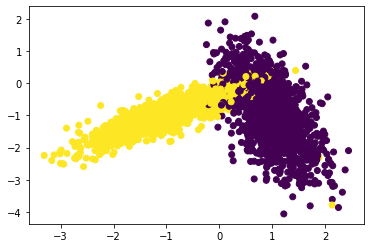

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

<pre>
def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    # x_train: its numpy array of shape, (n,d)
    # y_train: its numpy array of shape, (n,) or (n,1)
    # classifier: its typically KNeighborsClassifier()
    # param_range: its a tuple like (a,b) a < b
    # folds: an integer, represents number of folds we need to devide the data and test our model
    
    
    #1.generate 10 unique values(uniform random distribution) in the given range "param_range" and store them as "params" 
    # ex: if param_range = (1, 50), we need to generate 10 random numbers in range 1 to 50
    #2.devide numbers ranging from  0 to len(X_train) into groups= folds
    # ex: folds=3, and len(x_train)=100, we can devide numbers from 0 to 100 into 3 groups 
      group 1: 0-33, group 2:34-66, group 3: 67-100
    #3.for each hyperparameter that we generated in step 1:
        # and using the above groups we have created in step 2 you will do cross-validation as follows
        
        # first we will keep group 1+group 2 i.e. 0-66 as train data and group 3: 67-100 as test data, and find train and
          test accuracies
          
        # second we will keep group 1+group 3 i.e. 0-33, 67-100 as train data and group 2: 34-66 as test data, and find
          train and test accuracies
          
        # third we will keep group 2+group 3 i.e. 34-100 as train data and group 1: 0-33 as test data, and find train and
          test accuracies
        # based on the 'folds' value we will do the same procedure
        
        # find the mean of train accuracies of above 3 steps and store in a list "train_scores"
        # find the mean of test accuracies of above 3 steps and store in a list "test_scores"
    #4. return both "train_scores" and "test_scores"

#5. call function RandomSearchCV(x_train,y_train,classifier, param_range, folds) and store the returned values into "train_score", and "cv_scores"
#6. plot hyper-parameter vs accuracy plot as shown in reference notebook and choose the best hyperparameter
#7. plot the decision boundaries for the model initialized with the best hyperparameter, as shown in the last cell of reference notebook

</pre>

In [3]:
from sklearn.metrics import accuracy_score
import math
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

def RandomSearchCV(x_train,y_train,classifier, param_range, folds):
    train_scores = []
    test_scores = []
    x_train_group = dict()
    y_train_group = dict()
    
    param_range = random.sample(range(1, 50), 10)
    param_range=sorted(param_range)
    index_range = math.floor(len(x_train) / folds)
    indexes = list(np.arange(0, len(x_train)+index_range, index_range))
    
    for j in tqdm(range(0, folds)):
        start = indexes[j]
        end = indexes[j+1]

        x_train_group['fold_' +str(j+1)] = x_train[start : end]
        y_train_group['fold_' +str(j+1)] = y_train[start : end]
    
    for k in param_range:   
        train_scores_folds = []
        test_scores_folds  = []
        classifier.n_neighbors = k
        
        for j in tqdm(range(0, folds)):
            test_fold_index = list(range(1, folds+1))[-j]
            train_fold_index = list(range(1, folds+1))
            train_fold_index.remove(test_fold_index)

            X_test_fold = x_train_group['fold_' + str(test_fold_index)]
            y_test_fold = y_train_group['fold_' + str(test_fold_index)].reshape(-1,1)
            xtrain_fold, ytrain_fold = [], []
            
            for count, index in enumerate(train_fold_index):
                if count == 0:
                    xtrain_fold.append(x_train_group['fold_' +str(index)])
                    ytrain_fold.append(y_train_group['fold_' +str(index)].reshape(-1,1))
                else:
                    xtrain_fold[0] = np.vstack((xtrain_fold[0], x_train_group['fold_' +str(index)]))
                    ytrain_fold[0] = np.vstack((ytrain_fold[0], y_train_group['fold_' +str(index)].reshape(-1,1)))
          
            
            classifier.fit(xtrain_fold[0],ytrain_fold[0])

            Y_predicted = classifier.predict(X_test_fold)
            test_scores_folds.append(accuracy_score(y_test_fold, Y_predicted))

            Y_predicted = classifier.predict(xtrain_fold[0])
            train_scores_folds.append(accuracy_score(ytrain_fold[0], Y_predicted))
            
        train_scores.append(np.mean(np.array(train_scores_folds)))
        test_scores.append(np.mean(np.array(test_scores_folds)))
        
    return train_scores, test_scores, param_range

100%|█████████████████████████████████████████████████████████████████████████████████| 5/5 [00:01<00:00,  4.72it/s]

[0.9631666666666666, 0.9593666666666667, 0.9571666666666667, 0.9572666666666667, 0.9569333333333333, 0.9574, 0.9577666666666668, 0.9575999999999999, 0.9570333333333334, 0.9573666666666666] [0.9518666666666666, 0.9521333333333333, 0.9549333333333333, 0.9548, 0.9551999999999999, 0.9554666666666666, 0.9559999999999998, 0.9556000000000001, 0.9549333333333333, 0.9559999999999998] [4, 10, 27, 29, 30, 33, 34, 36, 37, 42]


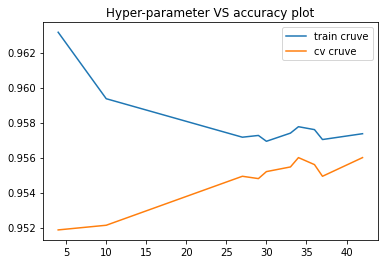

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

classifier = KNeighborsClassifier()           

trainscores,cvscores, param_range = RandomSearchCV(X_train, y_train, classifier, param_range=(1, 15), folds=5)
print(trainscores,cvscores, param_range)
 

plt.plot(param_range,trainscores, label='train cruve')
plt.plot(param_range,cvscores, label='cv cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [5]:
# understanding this code line by line is not that importent 
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

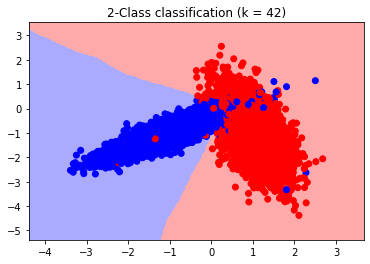

In [6]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 42)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)